In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import cv2

from tensorflow import keras
from keras import layers

## 1) The Dataset

- Assuming you have a classification problem, is it binary, multi-class or multi-label?

- Show a few examples per class

- How many classes?

- How many images per class?

- Train/Test sizes

- Image size?

- How are the images labeled?

- Dataset source(s)?

- Multi-class classification problem
- 4 classes: "bio", "glass", "plastic", "paper"
- Images per class - bio: 449, glass: 798, paper 647, plastic: 790
- Train size: 64%%, Test size: 20%, Validation size: 16%
- Image size - various resolutions resized to 256x256
- Labels - bio: 0, glass: 1, paper: 2, plastic: 3
- Dataset sources: Google Images, imSitu, [Kaggle - "Garbage Classification" dataset](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification)

### Example images per class

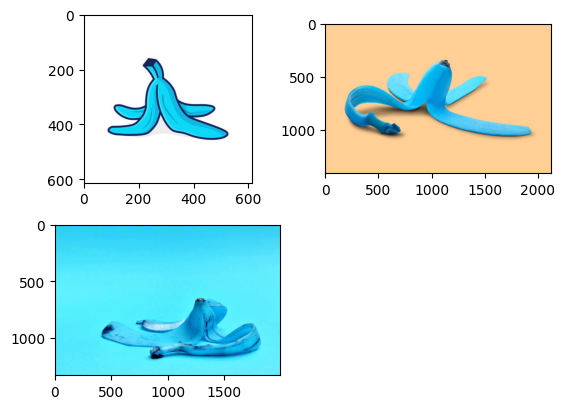

In [3]:
# "bio" class images
bio1 = cv2.imread("final_dataset/bio/bananapeel0.jpeg")
bio2 = cv2.imread("final_dataset/bio/bananapeel1.jpeg")
bio3 = cv2.imread("final_dataset/bio/bananapeel2.jpeg")


fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(bio1)

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(bio2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(bio3)


plt.show()


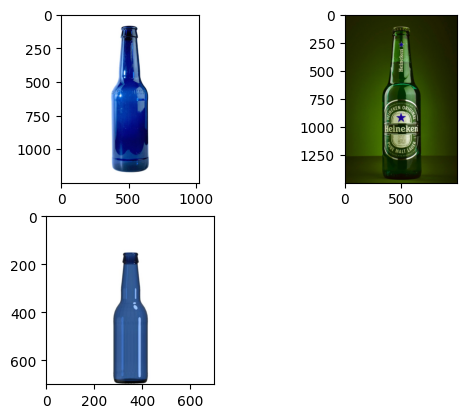

In [4]:
# "Glass" class images
glass1 = cv2.imread("final_dataset/glass/beerbottle0.jpeg")
glass2 = cv2.imread("final_dataset/glass/beerbottle1.jpeg")
glass3 = cv2.imread("final_dataset/glass/beerbottle2.jpeg")


fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(glass1)

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(glass2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(glass3)


plt.show()

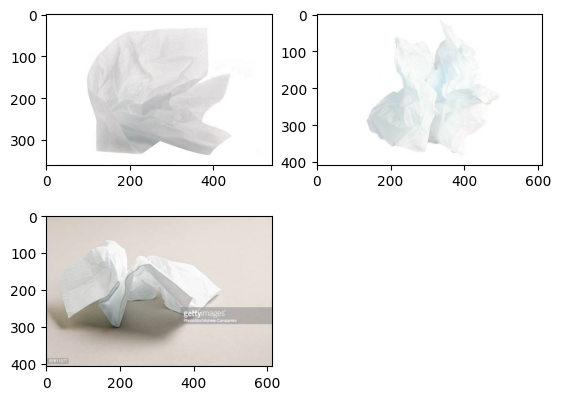

In [5]:
# "Paper" class images
paper1 = cv2.imread("final_dataset/paper/usedtissue2.jpeg")
paper2 = cv2.imread("final_dataset/paper/usedtissue5.jpeg")
paper3 = cv2.imread("final_dataset/paper/usedtissue4.jpeg")


fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(paper1)

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(paper2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(paper3)


plt.show()

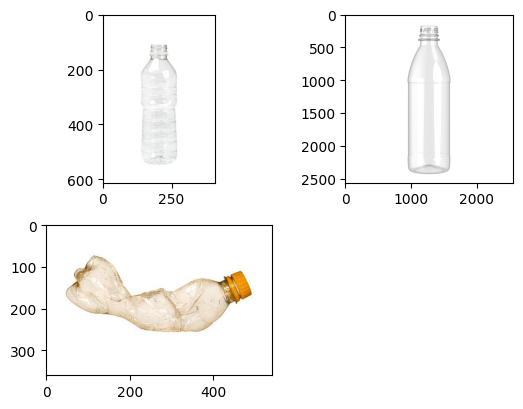

In [6]:
# "Plastic" class images
plastic1 = cv2.imread("final_dataset/plastic/plasticbottle0.jpeg")
plastic2 = cv2.imread("final_dataset/plastic/plasticbottle1.jpeg")
plastic3 = cv2.imread("final_dataset/plastic/plasticbottle3.jpeg")


fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(plastic1)

ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(plastic2)

ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(plastic3)


plt.show()

### a) Loading the dataset

In [7]:
X = []
y = []

for fpath in glob.glob("final_dataset/bio/*.jp*g"):
    im = cv2.imread(fpath, cv2.IMREAD_COLOR)
    im = cv2.resize(im, (256, 256))
    label = 0
    X.append(im)
    y.append(label)

for fpath in glob.glob("final_dataset/glass/*.jp*g"):
    im = cv2.imread(fpath, cv2.IMREAD_COLOR)
    im = cv2.resize(im, (256, 256))
    label = 1
    X.append(im)
    y.append(label)

for fpath in glob.glob("final_dataset/paper/*.jp*g"):
    im = cv2.imread(fpath, cv2.IMREAD_COLOR)
    im = cv2.resize(im, (256, 256))
    label = 2
    X.append(im)
    y.append(label)

for fpath in glob.glob("final_dataset/plastic/*.jp*g"):
    im = cv2.imread(fpath, cv2.IMREAD_COLOR)
    im = cv2.resize(im, (256, 256))
    label = 3
    X.append(im)
    y.append(label)

X = np.array(X)
y = np.array(y)


In [8]:
X.shape

(2585, 256, 256, 3)

## 2) Baselines
Random guess accuracy?

Human-Level Performance accuracy?

Multilayer Perceptron accuracy?

- Random guess accuracy: 25%
- Human-Level Performance: 92%
- Multilayer Perceptron accuracy: 33%

## 3) Preprocessing

Explain all the preprocessing steps you did.

In [9]:

from keras.preprocessing.image import ImageDataGenerator

# Create data generator
data_generator = ImageDataGenerator(
    rotation_range=180,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2
)

# Generate batches of augmented data
data_generator.fit(X)

# Generate augmented images and labels
X_augmented, y_augmented = next(data_generator.flow(X, y, batch_size=250))

In [10]:
# DELETEEEEEEEEEEE
X_augmented.shape

(250, 256, 256, 3)

In [11]:
X = np.concatenate((X, X_augmented))
y = np.concatenate((y, y_augmented))


In [12]:
X = X.reshape(-1, 256, 256, 3)

# Normalize the pixel values
X = X / 255

X.shape

(2835, 256, 256, 3)

In [13]:
from keras.utils import to_categorical

y = to_categorical(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=19)

## 4) CNN architecture

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'))
# batch normalization
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# dropout here
model.add(Dense(units=128, activation='relu'))
# or here
model.add(Dense(units=4, activation='softmax'))


In [16]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\mdziechciarz\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## 5) CNN training

- Loss function

- Optimizer (with its hyper-parameters)

- Metrics

- Learning curves

In [17]:

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='auto')

In [18]:
H = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
57/57 [==============================] - 89s 1s/step - loss: 8.0893 - accuracy: 0.3881 - val_loss: 1.0159 - val_accuracy: 0.5485
Epoch 2/10
57/57 [==============================] - 77s 1s/step - loss: 0.7832 - accuracy: 0.6913 - val_loss: 0.9268 - val_accuracy: 0.5881
Epoch 3/10
57/57 [==============================] - 68s 1s/step - loss: 0.4676 - accuracy: 0.8368 - val_loss: 1.0266 - val_accuracy: 0.6123
Epoch 4/10
57/57 [==============================] - 69s 1s/step - loss: 0.2740 - accuracy: 0.9140 - val_loss: 1.1781 - val_accuracy: 0.6564
Epoch 5/10
57/57 [==============================] - 70s 1s/step - loss: 0.1717 - accuracy: 0.9515 - val_loss: 1.1533 - val_accuracy: 0.6101


In [19]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 6s 336ms/step - loss: 1.0920 - accuracy: 0.6208


[1.0919634103775024, 0.6208112835884094]

In [20]:
model.save("waste_class_model.h5")

## 6) Model performance

### Learning curves

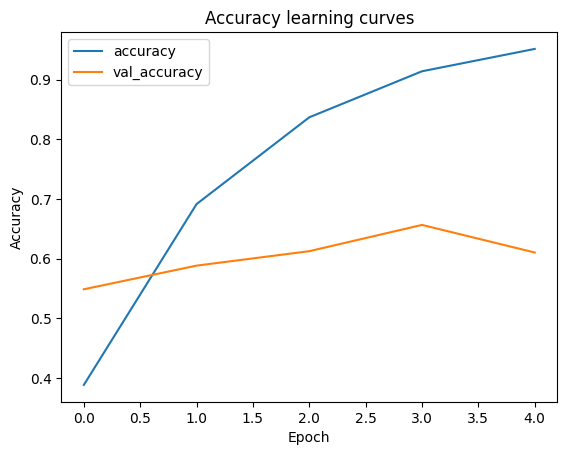

In [21]:
def accuracy_plotter(H):
    plt.plot(H.history["accuracy"], label='accuracy')
    plt.plot(H.history["val_accuracy"], label='val_accuracy')
    plt.title('Accuracy learning curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
accuracy_plotter(H)

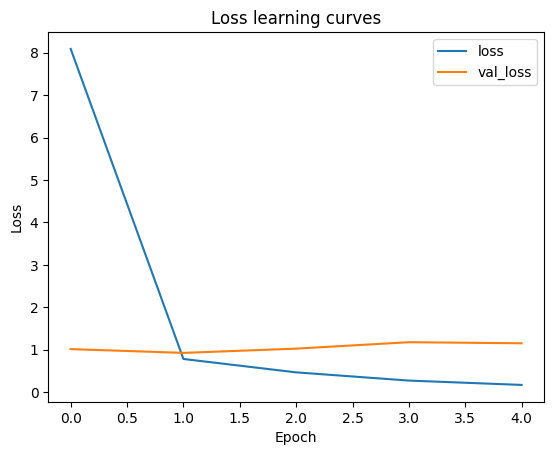

In [22]:
def loss_plotter(H):
    plt.plot(H.history["loss"], label='loss')
    plt.plot(H.history["val_loss"], label='val_loss')
    plt.title('Loss learning curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()



loss_plotter(H)


### Metrics: Accuracy, Precision, Recall, F1 Score

In [47]:
#import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the predicted labels from the model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Get the true labels from the test set
actual = np.argmax(y_test, axis=1)

#calculate the metrics
accuracy = accuracy_score(actual, predictions)
precision = precision_score(actual, predictions, average='macro')
recall = recall_score(actual, predictions, average='macro')
f1 = f1_score(actual, predictions, average='macro')

#print out the metrics
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 Score: %f' % f1)


18/18 [==============================] - 6s 345ms/step
Accuracy: 0.620811
Precision: 0.652652
Recall: 0.666753
F1 Score: 0.650227


## 7) Error analysis

Top error interpretation

In [48]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Create the confusion matrix
cm = confusion_matrix(actual, predictions)

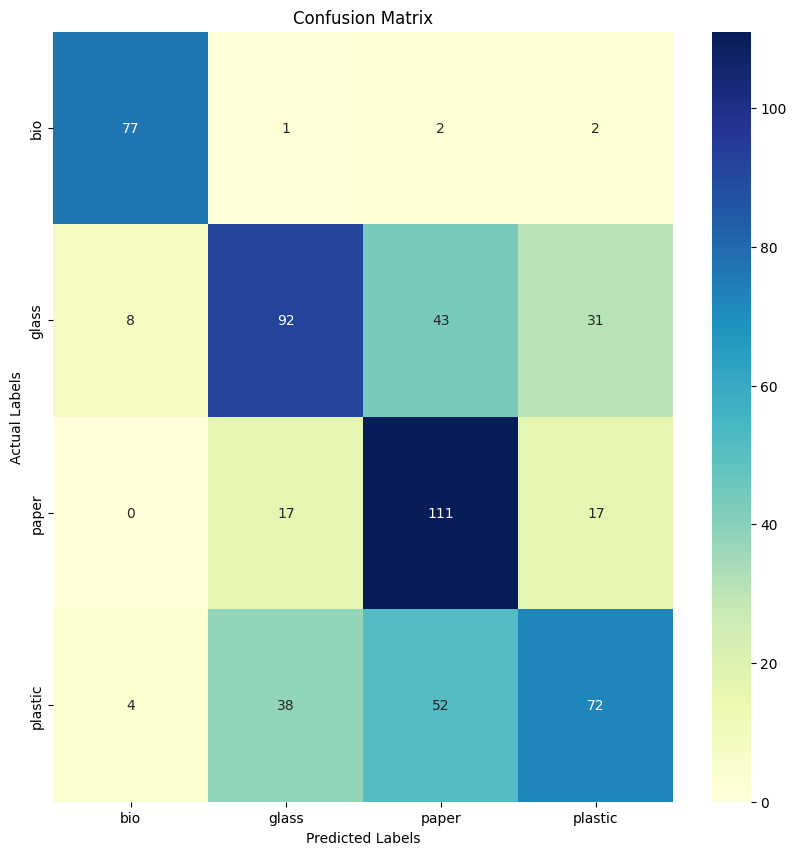

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ["bio", "glass", "paper", "plastic"]

#plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=ax, xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()